## Exercise 


For this exercise, you will be working with the [House Price Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code).

Please grab the train.csv file from Kaggle and explore this dataset. You need to perform explroatory data analysis and see if there is any correlation between the variables and analyze the distribution of the dataset. The question is open-ended and basically you're asked to perform EDA. 


1- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 3 of your assignment, you need to submit at least one jupyter notebook file and one pdf file.


2- Push your code and project to github and provide the link to your code here. Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510





In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [16]:
df = pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Exploratory Data Analysis

We can see that the dataset consists of 38 numerical columns of 81 all. Morover, some columns contain missing data. 

In [27]:
print(df.shape)


(1460, 81)


In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [29]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice_Log
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216


In [17]:
# Basic summary:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\Aarushi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

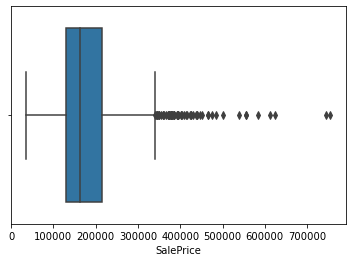

In [18]:
sns.boxplot(df['SalePrice'])

There are two outliers with prices more than 700000.

### The target variable : Distribution of SalePrice

Skewness: 1.882876
Kurtosis: 6.536282


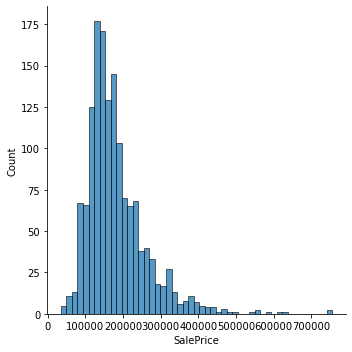

In [19]:
sns.displot(df['SalePrice']);
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

As we see, the target variable SalePrice is not normally distributed.
This can reduce the performance of the ML regression models because some assume normal distribution,
see sklearn info on preprocessing
Therfore we make a log transformation, the resulting distribution looks much better.

Skewness: 0.121335
Kurtosis: 0.809532


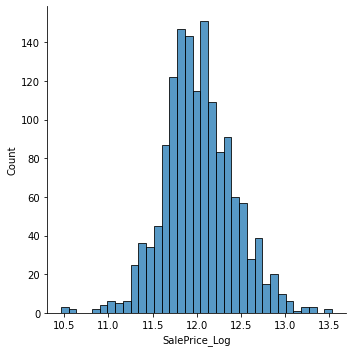

In [20]:
df['SalePrice_Log'] = np.log(df['SalePrice'])

sns.displot(df['SalePrice_Log']);
# skewness and kurtosis
print("Skewness: %f" % df['SalePrice_Log'].skew())
print("Kurtosis: %f" % df['SalePrice_Log'].kurt())
# dropping old column
df.drop('SalePrice', axis= 1, inplace=True)

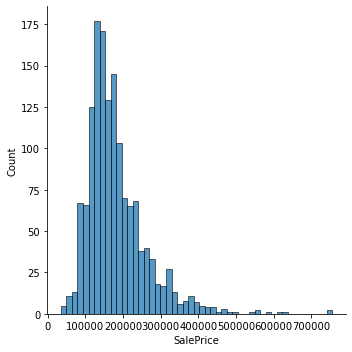

In [8]:
# The Density Plot of SalePrice
sns.displot(df['SalePrice'])

it is right-skewed distribution with the pick around 160k and quite long tail with maximum about 800k.

In [9]:
# Positive Skeweness:
df['SalePrice'].skew()

1.8828757597682129

In [63]:
y_train = df["SalePrice"]

## Check Missing Data

#### Columns with Nan values

At first, I am checking the fraction of Nan values in each column.

In [67]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


Further narrowing down, we will look for numerical type features with missing values in each of the train data and test data. First, we will search from the train data.

### Visualize with a heatmap
Let's visualize the correlation of feature quantities with a heatmap and confirm.

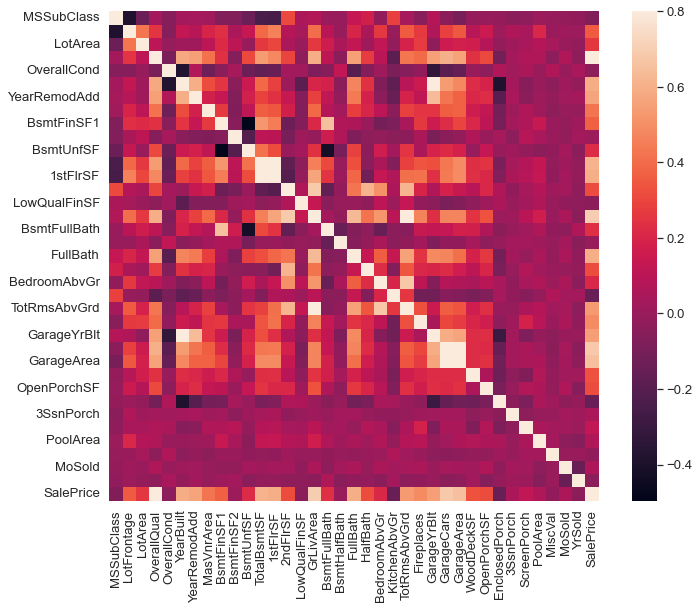

In [69]:
#correlation matrix
df=df.drop(['Id'],axis=1).copy()
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

We can see that 'OverallQual', 'GrLivArea', 'GarageCars',' GarageArea ',' TotalBsmtSF etc are strongly correlated with 'SalePrice'.

### Analyze, identify patterns, and explore the data.

Analyze by pivoting features
We will explore the relationship with 'SalePrice' about the feature quantity of the object type which does not include the missing value. From the name of feature quantity we pick up what seems to be strongly related to 'SalePrice' and analyze the mutual relationship with pivot.

### Creating new feature extracting from existing
We can convert the categorical titles to ordinal.

In [70]:
df[['HouseStyle', 'SalePrice']].groupby(['HouseStyle'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,HouseStyle,SalePrice
3,2.5Fin,2.579223
5,2Story,2.578496
7,SLvl,2.564995
2,1Story,2.563969
4,2.5Unf,2.557606
0,1.5Fin,2.550170
6,SFoyer,2.548212
1,1.5Unf,2.533208


### 'SalePrice' correlation matrix (zoomed heatmap style)
Select 10 features including 'SalePrice' which has strong correlation with 'SalePrice' and display it with a heat map.

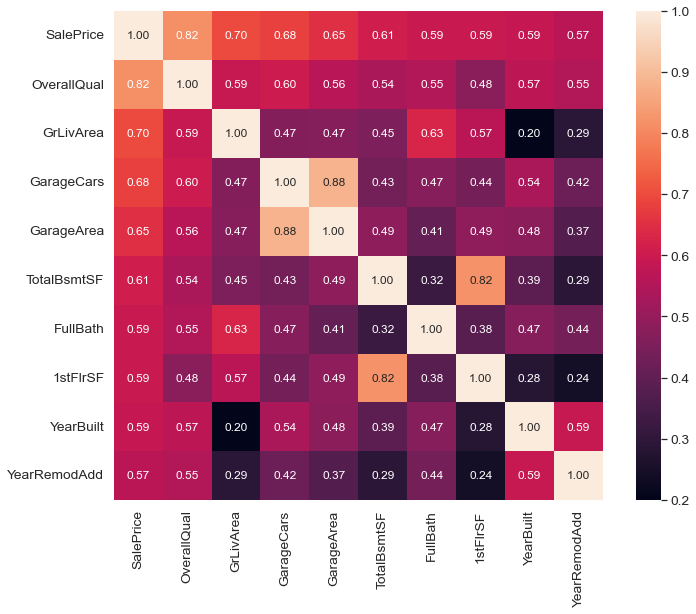

In [71]:
#saleprice correlation matrix
k = 10  #number of variables for heatmap
corrmat = df.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
f,ax=plt.subplots(figsize=(12,9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

'GarageArea' and 'GarageCars' are indicators showing the same thing at different angles, so we can see that the correlation coefficient is close.

Unfortunately, it was confirmed that 'HouseStyle' and 'HeatingQC' are weakly correlated with 'SalePrice'.

### Scatter plots between 'SalePrice' and correlated variables
In order to check for outliers, convert the heatmap to a scatter plot with the pairplot method.

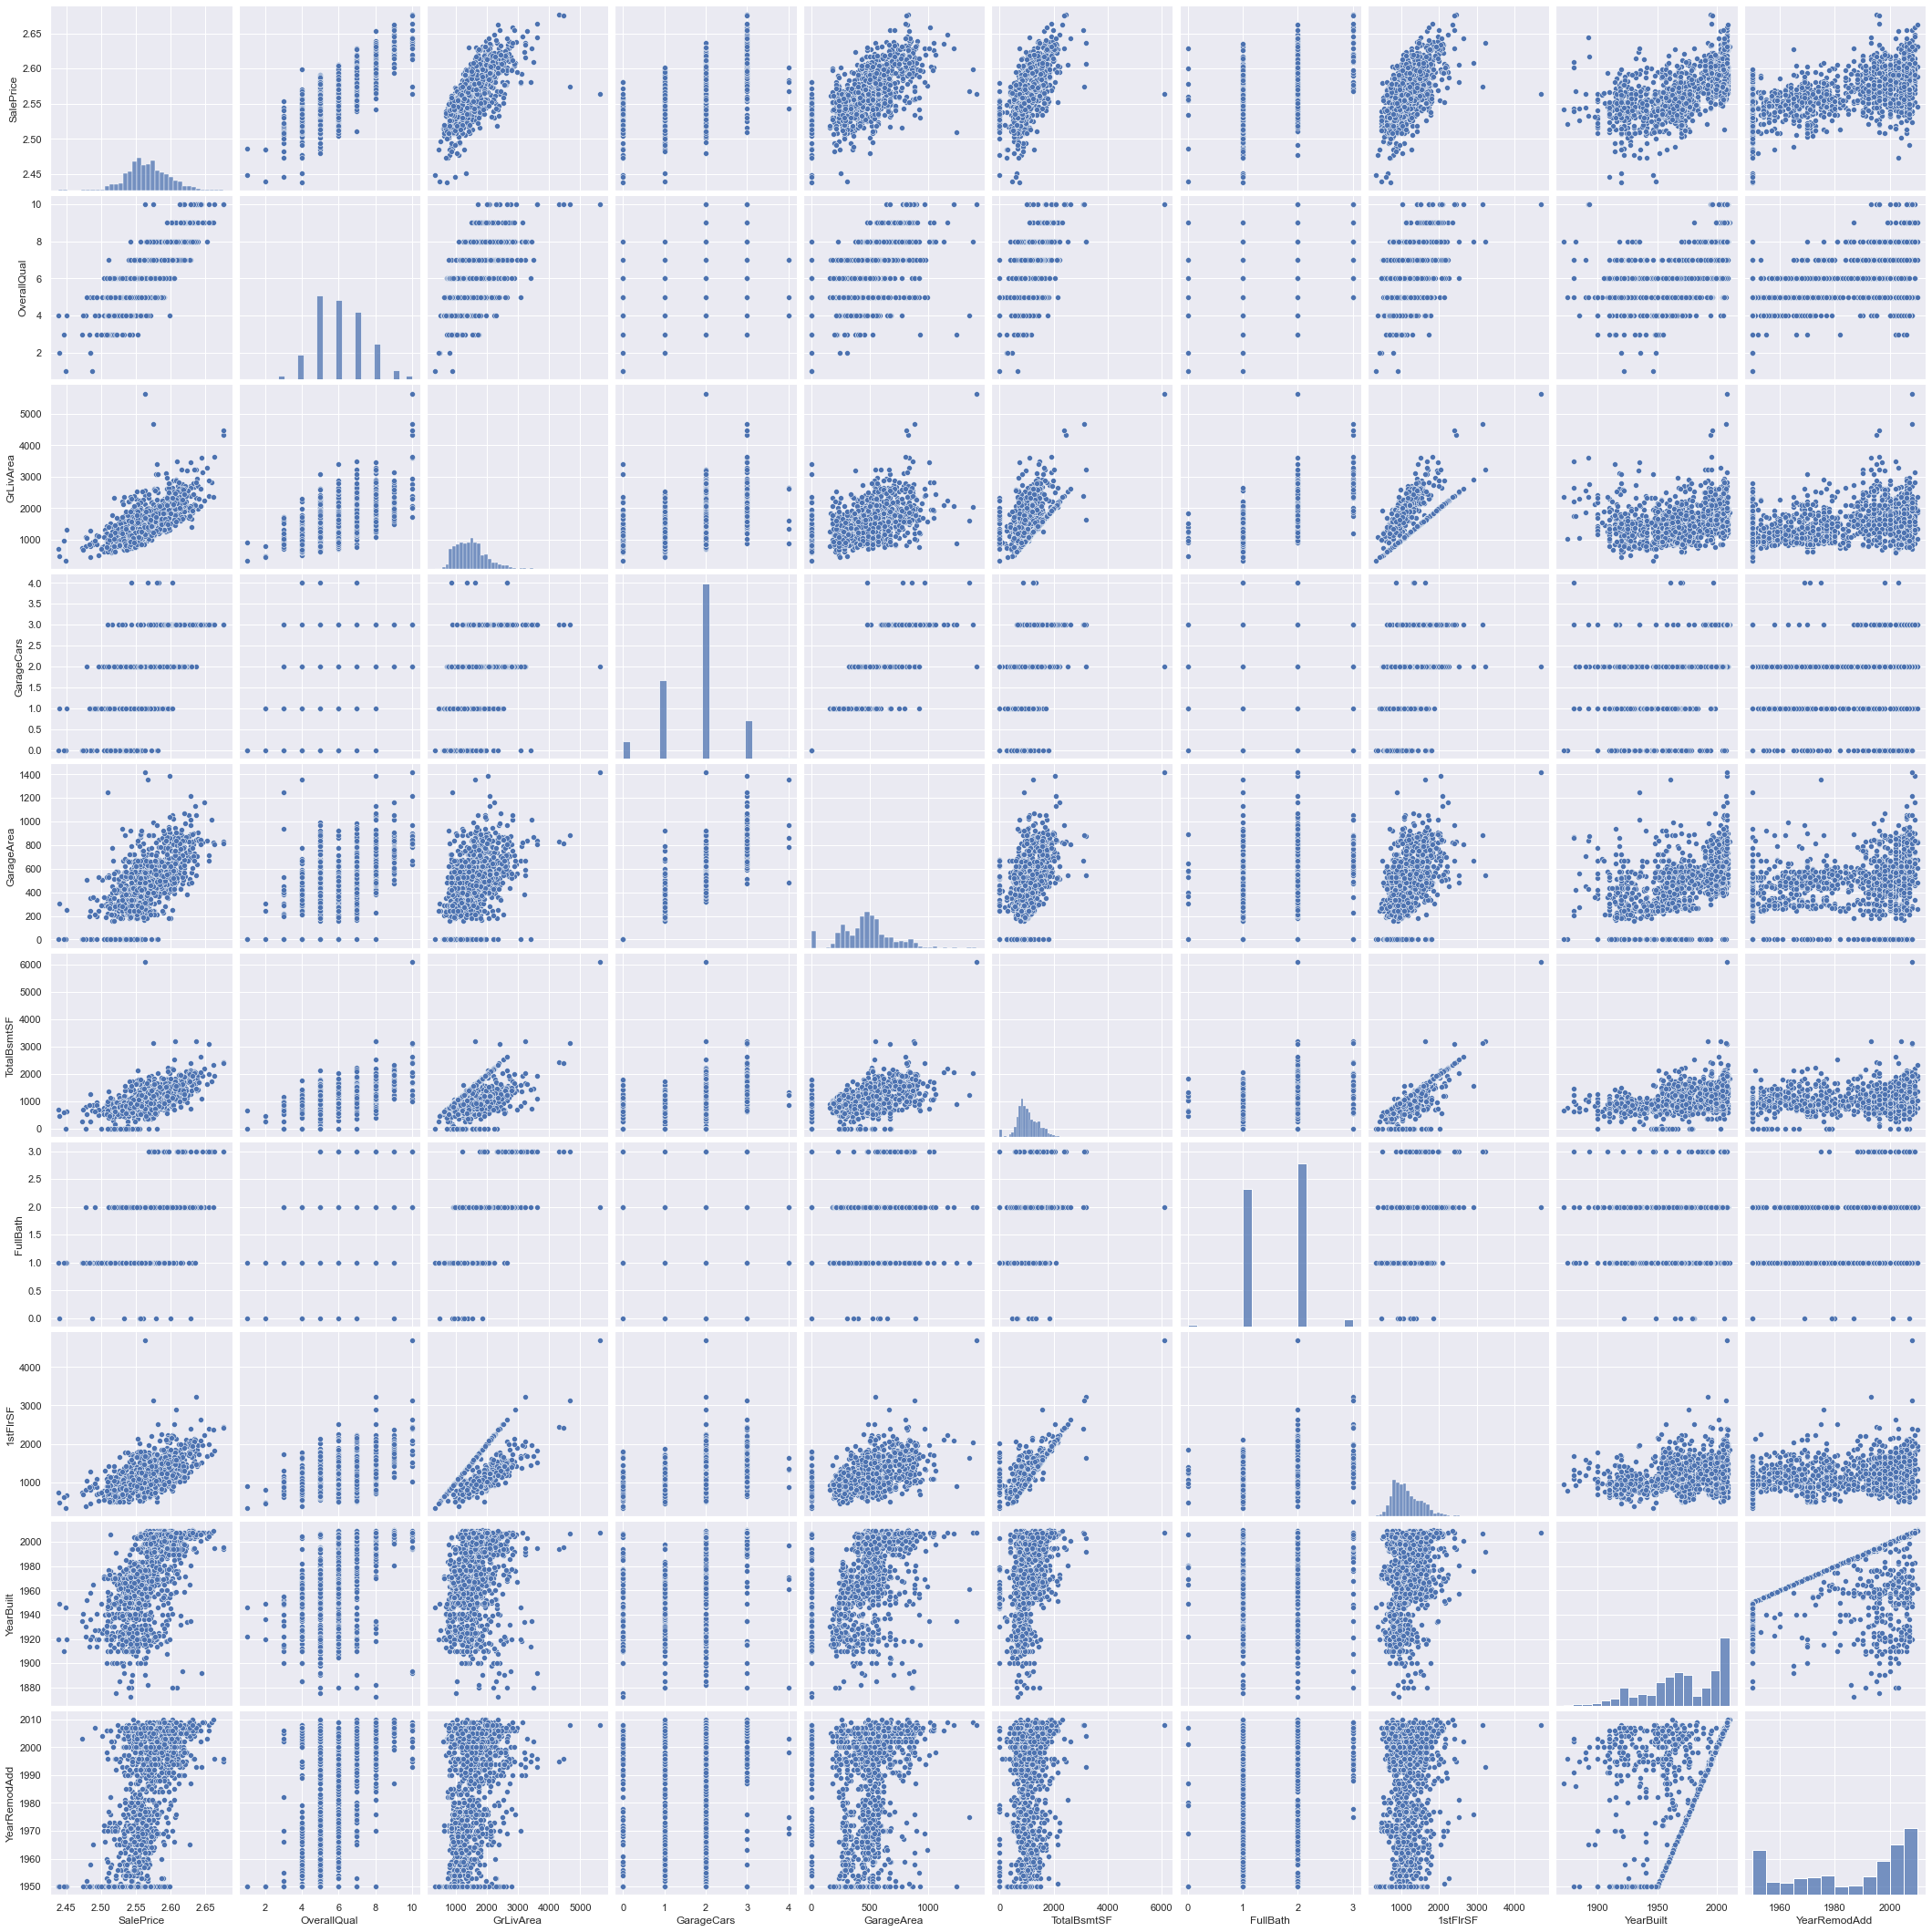

In [74]:
#scatter plots
sns.set()
sns.pairplot(df[cols], height = 3)
plt.show();

### Bivariate analysis
When checking the correlation between 'SalePrice' and 'GrLivArea' with a scatter plots, outlier 2 is found at the lower right. Let's delete this.

Let's check the result of the operation with the scatter plot of 'SalePrice' and 'GrLivArea'.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

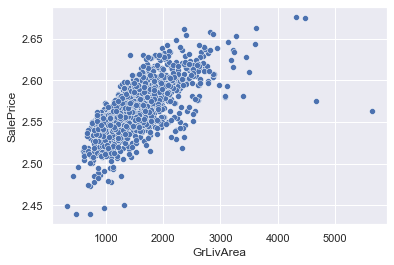

In [82]:
#　bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data1 = pd.concat([df['SalePrice'], df[var]], axis=1)
sns.scatterplot(data = data1, x=var, y='SalePrice')

In this way the outliers have been properly deleted.

We will look at the heatmap of 'SalePrice' and feature amount best ten 10 again. The correlation coefficient also rises somewhat, which shows that the ranking has changed.

As we see, the target variable SalePrice is not normally distributed.
This can reduce the performance of the ML regression models because some assume normal distribution,
see sklearn info on preprocessing
Therfore we make a log transformation, the resulting distribution looks much better.

### 